In [1]:
# 라이브러리 설치

!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.6 MB 16.3 MB/s eta 0:00:01
   ---- ----------------------------------- 1.3/10.6 MB 15.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.6 MB 17.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.0/10.6 MB 17.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 19.0 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.6 MB 19.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.3/10.6 MB 20.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.5/10.6 MB 20.7 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 20.5 MB/s eta 0:00

In [2]:
# 라이브러리 로드

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 이상치
- 값이 크게 차이가 나는 데이터
- 분석 모델의 성능을 떨어뜨리거나 분석 결과에 악영향
- 해당하는 이상치를 확인 후 대체, 제거
- 일반적으로 수치형 데이터의 이상치의 판단 기준은 IQR 방식
- IQR 방식은 matplotlib에서 제공하는 boxplot의 이상치 경계 기준을 그대로 사용
- IQR 방식은 Q3(3사분위수)와 Q1(1사분위)의 값의 차이를 이용, IQR == (Q3 - Q1)
- 이상치의 경계는 (Q3 + 1.5 * IQR)보다 크거나 (Q1 - 1.5 * IQR)보다 작은 범위를 이상치로 간주 (일반적)

In [3]:
# scikit-learn에서 제공하는 샘플 데이터 로드

wine_load = load_wine()

In [5]:
wine_load['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine = pd.DataFrame(wine_load['data'], columns= wine_load['feature_names'])

In [7]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<function matplotlib.pyplot.show(close=None, block=None)>

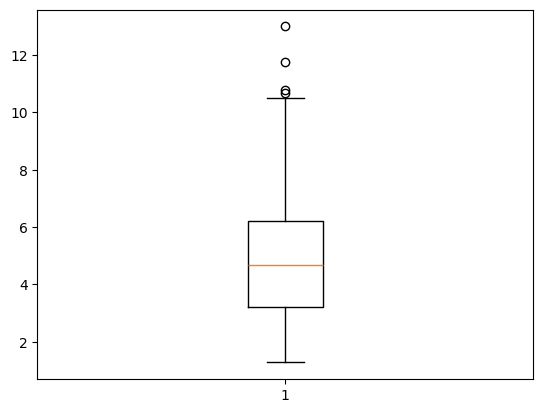

In [8]:
# matplotlib을 이용하여 boxplot 표시

plt.boxplot(wine['color_intensity'])

plt.show

In [10]:
# 이상치의 값들을 출력하는 함수를 생성
    # 매개변수 == 데이터프레임, 특정 column 명

def outliers_iqr(_df, _col):
    # _df = 데이터 프레임
    # _col = column 명
    
    # 1사분위 수, 3사분위 수를 변수에 대입
    q_1, q_3 = np.percentile(_df[_col], [25, 75])

    # IQR 데이터를 생성

    iqr = q_3 - q_1

    ## 이상치의 상단의 경계, 하단의 경계를 변수에 대입

    upper_whis = q_3 + 1.5 * iqr
    lower_whis = q_1 - 1.5 * iqr

    print('상단의 경계값 :', upper_whis)
    print('하단의 경계값 :', lower_whis)

    # 입력받은 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 낮은 데이터를 필터링

    flag = (_df[_col] > upper_whis) | (_df[_col] < lower_whis)
    result = _df.loc[flag]

    return result

In [13]:
outlier = outliers_iqr(wine, 'color_intensity')

상단의 경계값 : 10.670000000000002
하단의 경계값 : -1.2500000000000009


### 이상치의 정제
1. 이상치 제거
    - 데이터의 개수가 매우 많고 이상치가 존재하는 행의 수가 전체 데이터에서 많은 비중을 차지하지 않는다면 제거 가능
    - 이상치를 제거 == 데이터의 개수가 줄어든다.

2. 이상치를 특정한 값으로 대체
    - 이상치의 값을 다른 값으로 대체하는 경우 분석가에 따라 값들에 차이가 발생 가능

In [14]:
# 이상치를 제거 (해당하는 행을 제거)

drop_outlier = wine.drop(outlier.index, axis= 0)

## 제거가 잘 되었는 지 확인

print('원본데이터의 크기 :', len(wine), wine.shape)

print('이상치를 제거한 데이터의 크기 :', len(drop_outlier), drop_outlier.shape)

원본데이터의 크기 : 178 (178, 13)
이상치를 제거한 데이터의 크기 : 174 (174, 13)


In [17]:
## 이상치를 특정한 값으로 대체

wine.loc[outlier.index, 'color_intensity'] = np.NaN

In [18]:
wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 4
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [20]:
# 평균값을 변수에 대입
    # R과는 다르게 python은 결측치를 제외한 값들의 평균을 구해줌
mean_data = wine['color_intensity'].mean()

In [22]:
# 평균값을 결측치에 대체

wine['color_intensity'].fillna(mean_data, inplace= True)

C:\Users\USER\AppData\Local\Temp\ipykernel_28100\82291857.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine['color_intensity'].fillna(mean_data, inplace= True)


In [23]:
wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [24]:
wine.loc[outlier.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [25]:
from sklearn.datasets import load_iris

In [26]:
iris_load = load_iris()

In [27]:
iris = pd.DataFrame(iris_load['data'], columns= iris_load['feature_names'])

In [28]:
# iris['sepal width (cm)'] column에 극단치가 존재
# 해당하는 column의 중간값을 변수에 저장
# 해당하는 극단치를 결측치로 변경
# 결측치를 2번과정에서 나온 데이터로 대체


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
outlier = outliers_iqr(iris, 'sepal width (cm)')

상단의 경계값 : 4.05
하단의 경계값 : 2.05


In [30]:
outlier

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [34]:
median_data = iris['sepal width (cm)'].median()

# np.percentile(iris['sepal width (cm)'], 50) 이것도 가능

In [35]:
drop_outlier = iris.drop(outlier.index, axis= 0)

In [36]:
drop_outlier

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
iris.loc[outlier.index, 'sepal width (cm)'] = np.NaN

In [38]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [42]:
iris['sepal width (cm)'].fillna(median_data, inplace= True)

C:\Users\USER\AppData\Local\Temp\ipykernel_28100\3866005519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris['sepal width (cm)'].fillna(median_data, inplace= True)
C:\Users\USER\AppData\Local\Temp\ipykernel_28100\3866005519.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal w

In [43]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

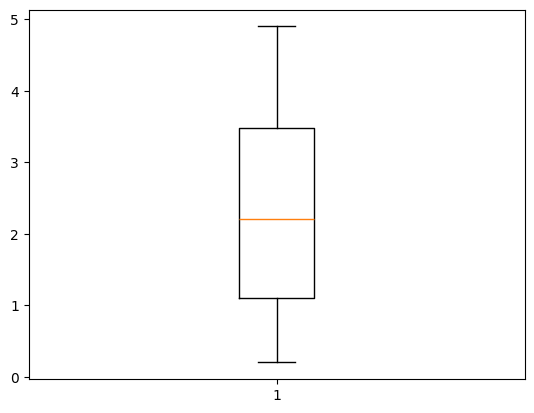

In [48]:
plt.boxplot(iris.loc[1])

plt.show